# 1-2. 데이터 핸들링 | 데이터 시각화 | 데이터 군집화
이번 실습에서는 수집된 결과물을 전처리하고 데이터 군집화를 해보도록 하겠습니다.<br>
<br>
**학습 목표**
1. Pandas를 이용한 데이터프레임 핸들링
2. Matplotlib과 Seaborn을 이용한 데이터 시각화
3. Scikit-learn을 활용한 군집화(Clustering)

In [ ]:
# 한글 폰트 설치
# 이 셀을 실행시키고 '런타임 > 세션 다시 시작'을 해주세요

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 15s (687 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

## 포켓몬 도감 크롤링
이번주에는 **포켓몬 도감**에서 능력치를 가져와 비지도 학습으로 **군집화**를 해보도록 하겠습니다.<br>
이번에는 표를 가지고 오는데, Pandas를 이용해 쉽게 가지고 오는 방법을 설명드리겠습니다.<br>

1. 영문 포켓몬 도감 가지고 오기
2. 한글 포켓몬 도감 가지고 오기
3. 영문 - 한글 포켓몬 도감 병합하기



In [ ]:
# 필요한 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [ ]:
def get_soup(url):
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')

    return soup

In [ ]:
# BeautifulSoup으로 영문 포켓몬 도감 수집
url = 'https://pokemondb.net/pokedex/all'
soup = get_soup(url)

In [ ]:
# 표 태그 찾기
html_table = soup.find('table') # 표는 보통 table 태그로 구성되어 있고, 그 아래 tr / td 등의 데이터로 이루어져 있습니다.

In [ ]:
# 표를 데이터 프레임으로 바로 가지고 오기
html_table = str(html_table) # html_table은 soup의 데이터로 되어 있기 때문에 문자열 데이터로 변경해주어야 합니다.
en_df = pd.read_html(html_table)[0] # 표를 리스트 형태로 반환하기 때문에 인덱싱을 해줘야 합니다.

In [ ]:
en_df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60
1212,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85
1213,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85


In [ ]:
# 한글 포켓몬 도감 수집
url = 'https://pokemon.fandom.com/ko/wiki/%EC%A0%84%EA%B5%AD%EB%8F%84%EA%B0%90'
soup = get_soup(url)

In [ ]:
# 한글 포켓몬 도감 데이터 프레임 생성
kr_df = pd.DataFrame()
for html_table in soup.find_all('table')[:-1]:
    kr_df_part = pd.read_html(str(html_table))[0]
    kr_df_part['지방'] = [re.sub('도감', '지방', kr_df_part.columns[0])]*len(kr_df_part)
    kr_df = pd.concat([kr_df, kr_df_part])

## 데이터 전처리

In [ ]:
# 한글 포켓몬 도감 확인
kr_df

# 여기에서 어떤 데이터를 가지고 와야 할지 봅시다.

,관동도감,전국도감,아이콘,포켓몬,타입,타입.1,지방,성도도감,호연도감,신오도감,하나도감,센트럴/코스트/마운틴 칼로스도감,알로라도감,가라르도감,히스이도감,팔데아도감
0,#001,#0001,NaN,이상해씨,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#002,#0002,NaN,이상해풀,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#003,#0003,NaN,이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,#0003,NaN,메가이상해꽃,풀독,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#004,#0004,NaN,파이리,불꽃,NaN,관동지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,#1021,NaN,날뛰는우레,전기드래곤,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#237블루베리
120,NaN,#1022,NaN,무쇠암석,바위에스퍼,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#239블루베리
121,NaN,#1023,NaN,무쇠감투,강철에스퍼,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#238블루베리
122,NaN,#1024,NaN,테라파고스,노말,NaN,팔데아지방,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#240블루베리


### 컬럼 추출 | 중복값 제거 | 데이터 병합

In [ ]:
# loc를 이용하여 특정 컬럼(또는 로우)를 추출하는 방법
kr_df.loc[:,['전국도감', '포켓몬', '지방']]

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방
...,...,...,...
119,#1021,날뛰는우레,팔데아지방
120,#1022,무쇠암석,팔데아지방
121,#1023,무쇠감투,팔데아지방
122,#1024,테라파고스,팔데아지방


In [ ]:
# 리스트 인덱싱을 통해 특정 컬럼만 추출하는 방법
kr_df = kr_df[['전국도감', '포켓몬', '지방']].copy(); kr_df

,전국도감,포켓몬,지방
0,#0001,이상해씨,관동지방
1,#0002,이상해풀,관동지방
2,#0003,이상해꽃,관동지방
3,#0003,메가이상해꽃,관동지방
4,#0004,파이리,관동지방
...,...,...,...
119,#1021,날뛰는우레,팔데아지방
120,#1022,무쇠암석,팔데아지방
121,#1023,무쇠감투,팔데아지방
122,#1024,테라파고스,팔데아지방


In [ ]:
# 병합을 위해 전국 도감 텍스트 전처리
kr_df['전국도감'] = kr_df['전국도감'].map(lambda x : int(re.sub('[^\w]', '', x))) # '#'을 빼고 001의 숫자는 정수 형태로 변경합니다.

In [ ]:
kr_df.duplicated(subset = ['전국도감'])

0      False
1      False
2      False
3       True
4      False
       ...  
119    False
120    False
121    False
122    False
123    False
Length: 1187, dtype: bool

In [ ]:
# 중복값 확인 및 제거
kr_df.drop_duplicates(subset = ['전국도감'], inplace = True) # 도감 번호를 키 값으로 변경하기 위해 중복값을 없애줍니다.

In [ ]:
# 컬럼명 변경
kr_df.columns = ['#', 'Name', 'Region']; kr_df

,#,Name,Region
0,1,이상해씨,관동지방
1,2,이상해풀,관동지방
2,3,이상해꽃,관동지방
4,4,파이리,관동지방
5,5,리자드,관동지방
...,...,...,...
119,1021,날뛰는우레,팔데아지방
120,1022,무쇠암석,팔데아지방
121,1023,무쇠감투,팔데아지방
122,1024,테라파고스,팔데아지방


In [ ]:
# 데이터 병합
df = pd.merge(en_df, kr_df, on = '#', suffixes = ['_EN', '']); df

,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,이상해씨,관동지방
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,이상해풀,관동지방
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,이상해꽃,관동지방
4,4,Charmander,Fire,309,39,52,43,60,50,65,파이리,관동지방
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98,무쇠감투,팔데아지방
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60,테라파고스,팔데아지방
1212,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85,테라파고스,팔데아지방
1213,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85,테라파고스,팔데아지방


### 데이터 정보 | 통계
만약 어떤 데이터를 처음 받았다면 구조를 알기 어렵습니다.<br>
컬럼별 데이터 타입을 확인하고, null 값이 있는지 확인하기 위해서는 데이터 정보 확인이 필수입니다.<br>
그리고 정형 데이터의 경우, 대략적인 통계량을 확인하는 것이 좋습니다.<br>
머신러닝 분석을 위해서 데이터 스케일을 조정해야 하는 경우가 있는데 이때 기초 통계량을 확인해둔다면 분석에 도움이 될 것입니다.

In [ ]:
# null값과 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        1215 non-null   int64 
 1   Name_EN  1215 non-null   object
 2   Type     1215 non-null   object
 3   Total    1215 non-null   int64 
 4   HP       1215 non-null   int64 
 5   Attack   1215 non-null   int64 
 6   Defense  1215 non-null   int64 
 7   Sp. Atk  1215 non-null   int64 
 8   Sp. Def  1215 non-null   int64 
 9   Speed    1215 non-null   int64 
 10  Name     1215 non-null   object
 11  Region   1215 non-null   object
dtypes: int64(8), object(4)
memory usage: 114.0+ KB


In [ ]:
# 데이터 프레임의 간략한 통계
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,501.735802,443.104527,71.244444,81.152263,75.007407,73.224691,72.441152,70.034568
std,298.979081,121.193406,26.927819,32.037134,30.740999,32.757152,27.578188,30.161298
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,240.500000,332.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,495.000000,465.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000
75%,753.500000,521.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


### 컬럼 연산

In [ ]:
# 타입 분리하기
type_ = df['Type'].str.split() # 자주 쓰는 방법은 아니겠지만, 그래도 이렇게 할 수 있다 정도만 알아두세요.

In [ ]:
# 타입 컬럼 추가
df['Type_1'] = type_.str[0]
df['Type_2'] = type_.str[1]

In [ ]:
# 컬럼 연산
df['Physical'] = df['Attack'] + df['Defense']
df['Special'] = df['Sp. Atk'] + df['Sp. Def']

In [ ]:
# .apply를 활용한 컬럼 연산
df.apply(lambda x : x['Attack'] + x['Defense'], axis = 1)

0        98
1       125
2       165
3       223
4        95
       ... 
1210    172
1211    150
1212    205
1213    215
1214    248
Length: 1215, dtype: int64

In [ ]:
# df 정보 확인
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   #         1215 non-null   int64 
 1   Name_EN   1215 non-null   object
 2   Type      1215 non-null   object
 3   Total     1215 non-null   int64 
 4   HP        1215 non-null   int64 
 5   Attack    1215 non-null   int64 
 6   Defense   1215 non-null   int64 
 7   Sp. Atk   1215 non-null   int64 
 8   Sp. Def   1215 non-null   int64 
 9   Speed     1215 non-null   int64 
 10  Name      1215 non-null   object
 11  Region    1215 non-null   object
 12  Type_1    1215 non-null   object
 13  Type_2    669 non-null    object
 14  Physical  1215 non-null   int64 
 15  Special   1215 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 152.0+ KB
None


,#,Name_EN,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Name,Region,Type_1,Type_2,Physical,Special
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,이상해씨,관동지방,Grass,Poison,98,130
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,이상해풀,관동지방,Grass,Poison,125,160
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,이상해꽃,관동지방,Grass,Poison,165,200
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,이상해꽃,관동지방,Grass,Poison,223,242
4,4,Charmander,Fire,309,39,52,43,60,50,65,파이리,관동지방,Fire,NaN,95,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98,무쇠감투,팔데아지방,Steel,Psychic,172,230
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60,테라파고스,팔데아지방,Normal,NaN,150,150
1212,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85,테라파고스,팔데아지방,Normal,NaN,205,215
1213,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85,테라파고스,팔데아지방,Normal,NaN,215,240


## 데이터 시각화
이제 Matplotlib과 Seaborn을 활용한 데이터 시각화를 해보도록 하겠습니다.<br>
보통은 Matplotlib을 활용해서 시각화를 하는 경우가 많은데 Pandas 데이터프레임을 활용하는 경우 Seaborn을 쓰는 게 편합니다.<br>
그런데 사실 Seaborn은 Matplotlib 위에서 동작하기 때문에 둘 다 알아두시면 좋아요.

In [ ]:
# 기본적으로 필요한 라이브러리를 불러오기
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 설정

# Seaborn에서 기본 스타일을 지정할 수 있습니다.
sns.set_theme(font ='NanumGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')

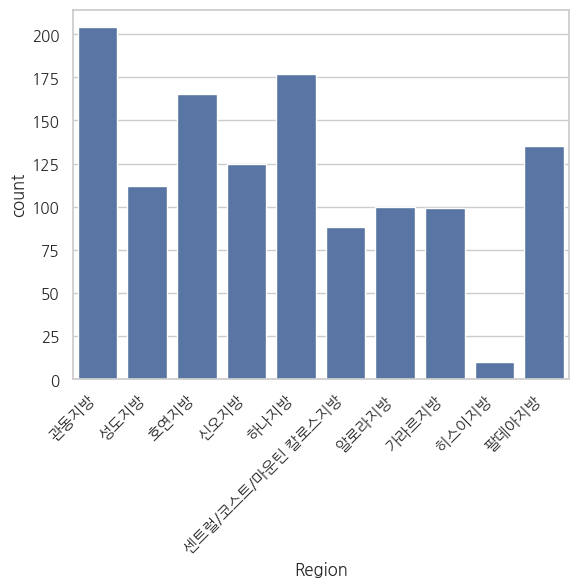

In [ ]:
# Countplot | 지방별 포켓몬 수 시각화
plt.figure(dpi=100) # 해상도 설정
plt.xticks(rotation=45, ha = 'right') # 45도 돌리고 오른쪽 맞춤
sns.countplot(x = 'Region', data = df) # data를 df로 지정했다면, df의 컬럼명을 넣는 것만으로 쉽게 시각화가 가능합니다.
plt.show()

In [ ]:
# 고윳값 추출
# 타입별 카운트를 알아보기 위해 고윳값을 추출합니다.

type_list = list(df['Type_1'].unique())
print(type_list)

['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying']


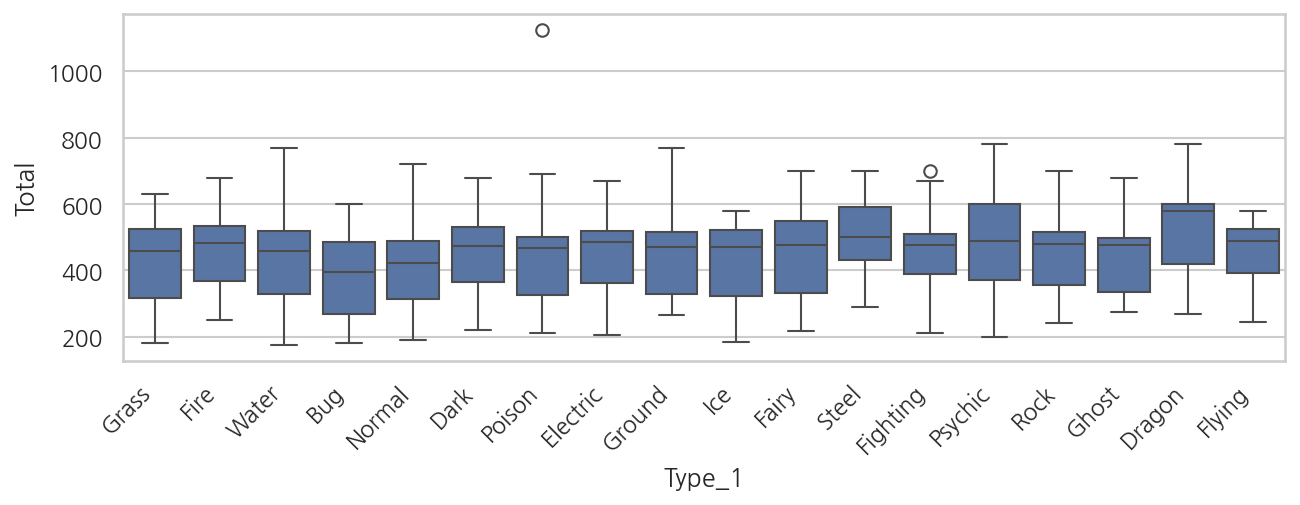

In [ ]:
# Boxplot | 타입_1별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150) # 여기에서 출력 사이즈를 지정합니다.
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_1', y = 'Total', data = df, order = type_list)
plt.show()

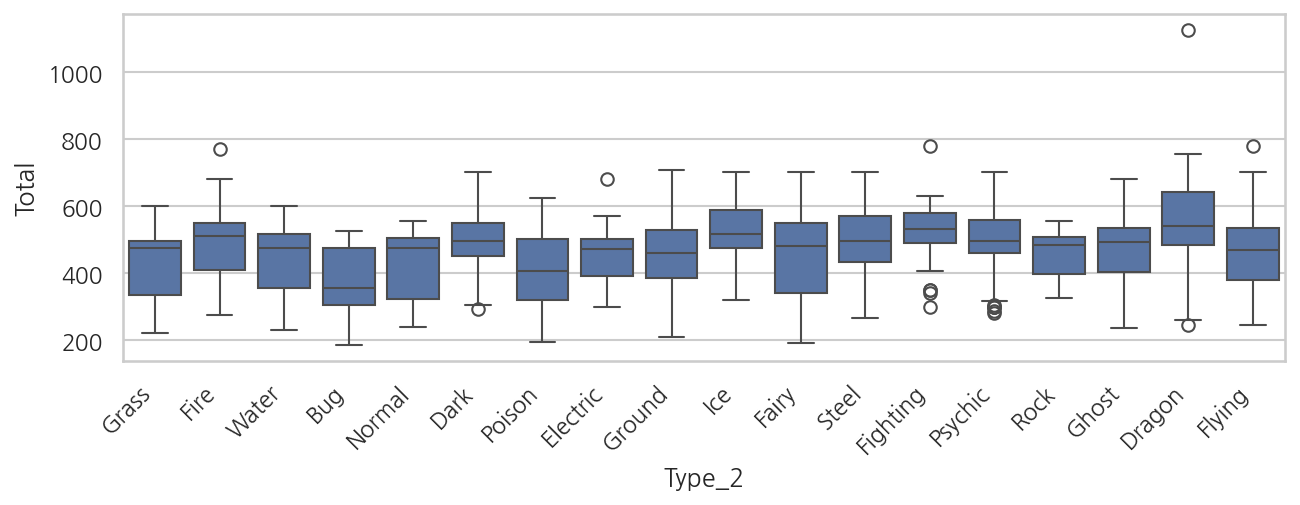

In [ ]:
# Boxplot | 타입_2별 포켓몬 능력치
plt.figure(figsize = (10,3), dpi=150)
plt.xticks(rotation=45, ha = 'right')
sns.boxplot(x = 'Type_2', y = 'Total', data = df, order = type_list)
plt.show()

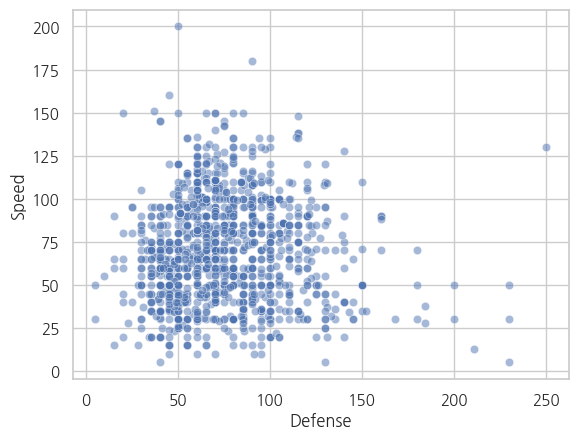

In [ ]:
# Scatterplot | 두 개의 연속형 데이터의 분포
plt.figure(dpi=100)
sns.scatterplot(x = 'Defense', y ='Speed', alpha = 0.5, data = df)
plt.show()

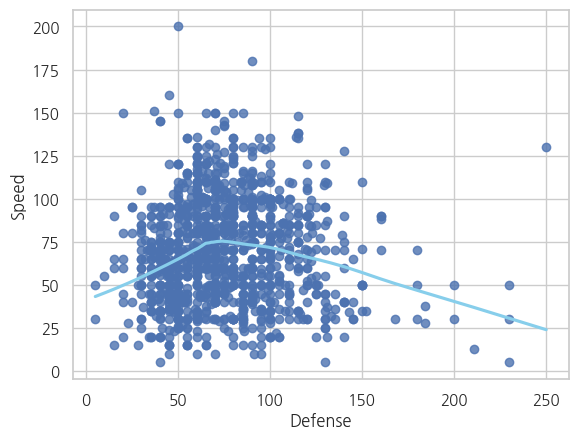

In [ ]:
# Regplot | Scatterplot + Regression Line
plt.figure(dpi=100)
sns.regplot(x = 'Defense', y ='Speed', lowess = True, data = df, line_kws = {'color': 'skyblue'})
plt.show()

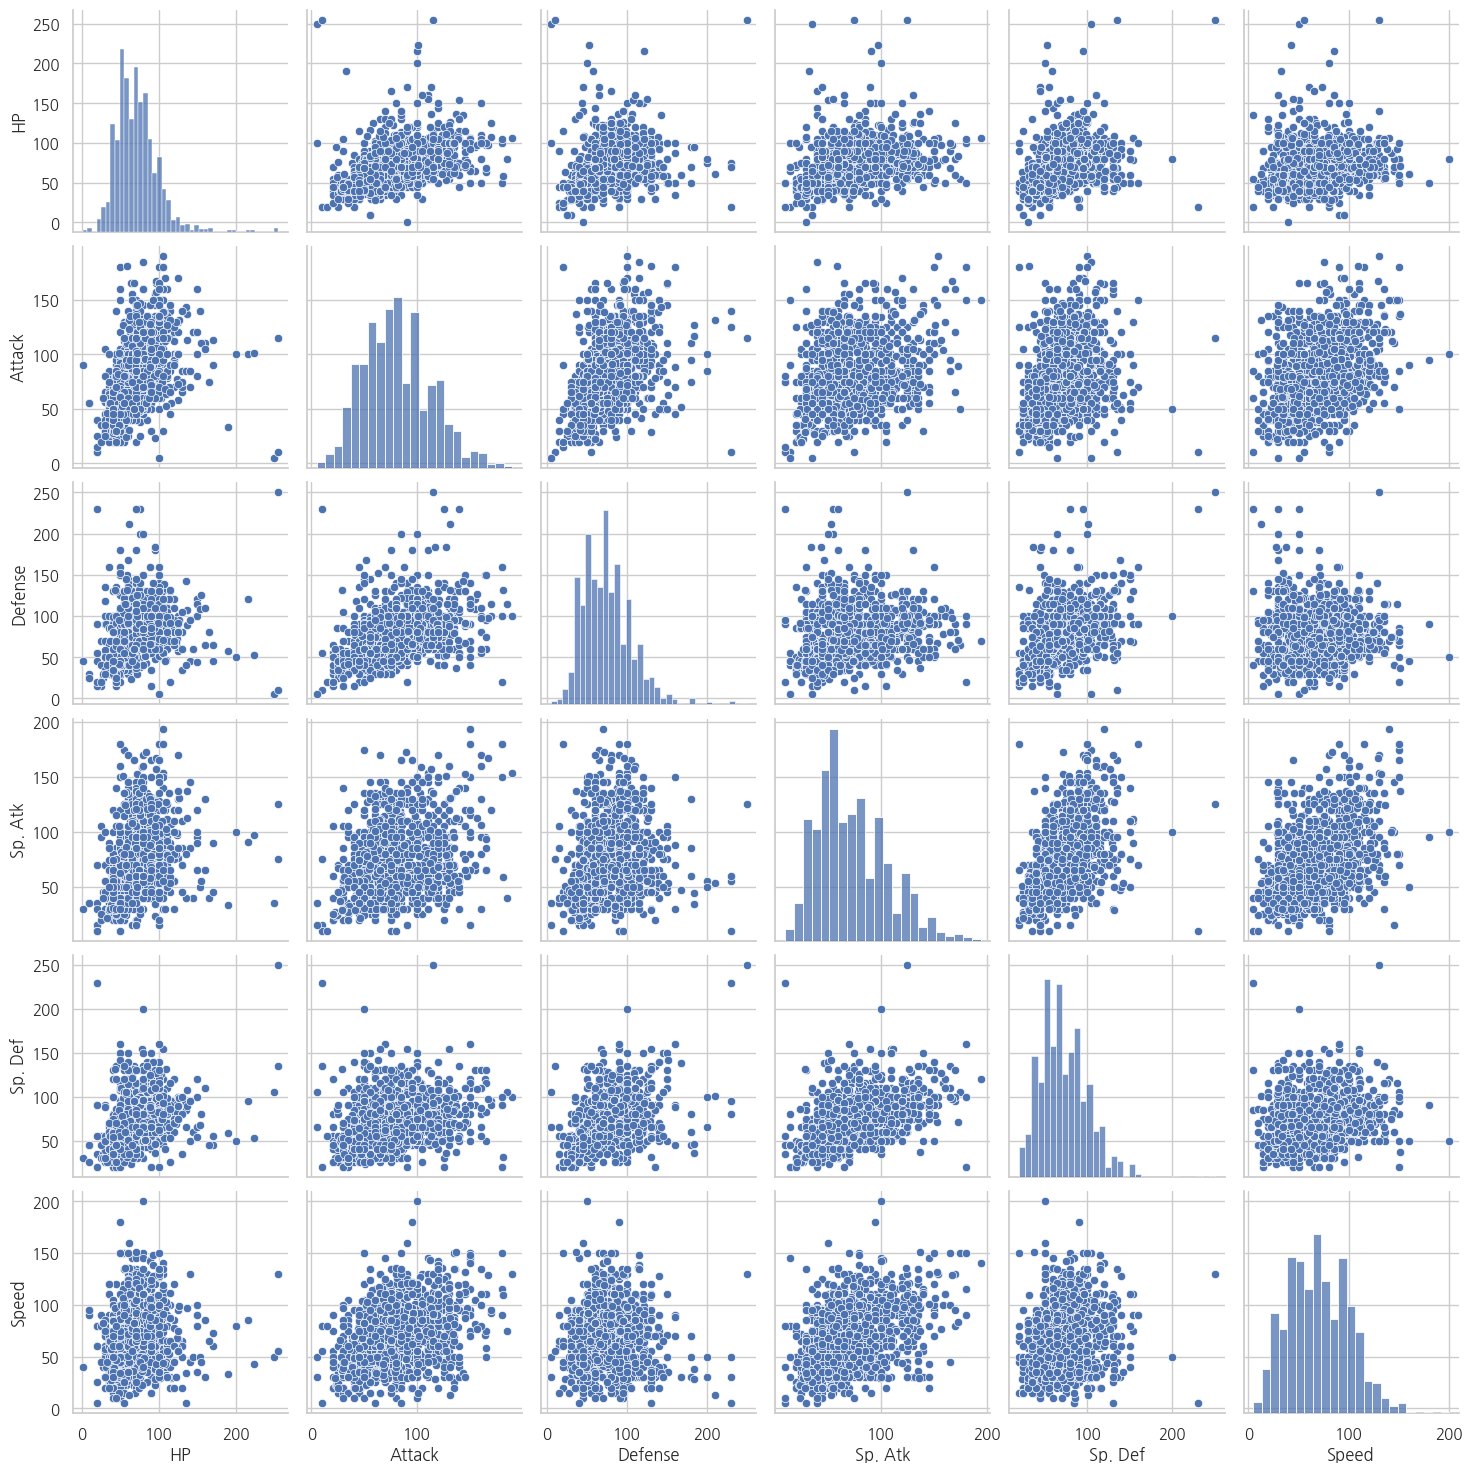

In [ ]:
# Pairplot | 모든 연속형 데이터의 Scatterplot과 히스토그램을 보고 싶을 때
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])
plt.show()

In [ ]:
# 인덱스를 활용한 컬럼(또는 로우) 추출
df.iloc[:,4:9]

,HP,Attack,Defense,Sp. Atk,Sp. Def
0,45,49,49,65,65
1,60,62,63,80,80
2,80,82,83,100,100
3,80,100,123,122,120
4,39,52,43,60,50
...,...,...,...,...,...
1210,90,72,100,122,108
1211,90,65,85,65,85
1212,95,95,110,105,110
1213,160,105,110,130,110


## 데이터 군집화
Clustering이라고도 불리는 군집화는 대표적인 **비지도 학습 기법** 중에 하나입니다.<br>
포켓몬을 능력치에 따라 구분한다고 하더라도 어떤 기준에 따라 군집화해야 할지 모를 수 있습니다.<br> 비지도 학습은 우리가 정답을 알지 못하더라도, 통계적인 기법을 통해 군집을 나눌 수 있도록 도와줍니다.<br>
물론, 비지도 학습의 특성상 정해진 답이 없기 때문에 최적의 값을 찾기 위한 시행착오가 있을 수 있습니다.

### 차원 축소 모델 (2차원 투영)
보통 하나의 컬럼 당 하나의 차원을 이룹니다.<br>
쉽게 생각해보면 X축과 Y축이 보통 우리가 생각하는 2차원인데요, 여기에 Z축이 포함된다면 3차원이라고 부르지요. 이처럼 하나의 축이 차원이라고 보시면 됩니다.<br>
하지만 군집화를 위해서는 우선 2차원 평면으로 투영(Projection)해야 합니다. 정보의 손실을 최소화하면서 2차원 값을 추출하는 방법으로는 PCA와 t-SNE가 있습니다. 자세한 설명은 생략하고 오늘은 코드만 구현해보겠습니다.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
result_pca = pca.fit_transform(df.iloc[:,3:9])
df[['X', 'Y']] = result_pca

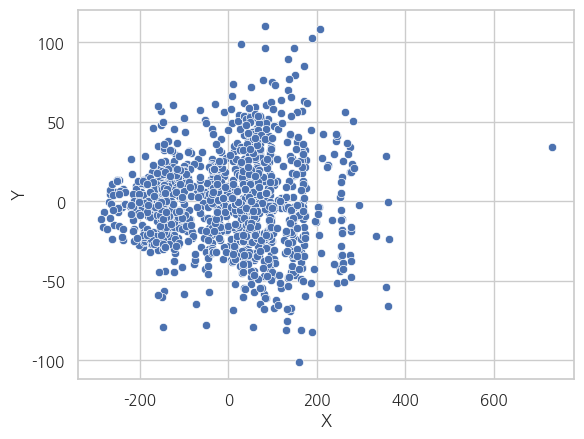

In [ ]:
# PCA 차원 축소 결과
sns.scatterplot(x = 'X', y = 'Y', data = df)
plt.show()

In [ ]:
tsne = TSNE(n_components=2, learning_rate = 1000, random_state = 319)
result_tsne = tsne.fit_transform(df.iloc[:,3:9])
df[['X', 'Y']] = result_tsne

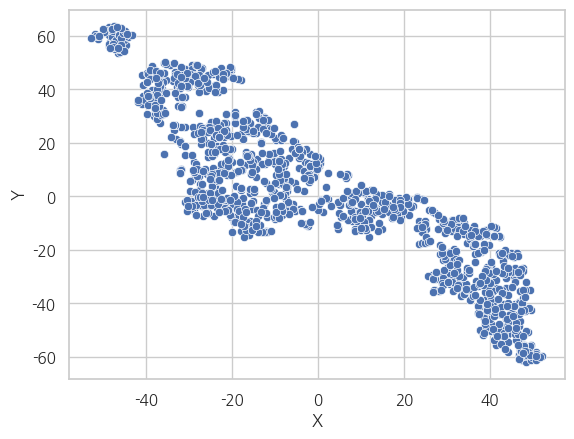

In [ ]:
# t-SNE 차원 축소 결과
sns.scatterplot(x = 'X', y = 'Y', data = df)
plt.show()

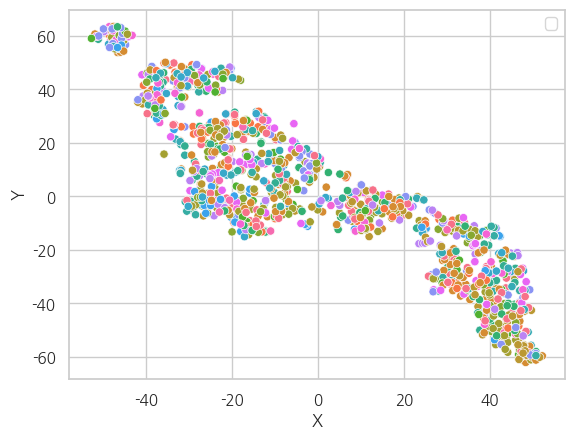

In [ ]:
# 포켓몬 타입과 군집의 상관 관계가 있을까?
sns.scatterplot(x = 'X', y = 'Y', data = df, hue = 'Type_1')
plt.legend('')
plt.show()

### 데이터 군집화 모델

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
# DBSCAN 모델
cluster = DBSCAN(eps = 3) # epsilon 값을 변경하면서 최적의 군집 분포를 도출합니다.
label = cluster.fit_predict(df.iloc[:,3:9])
df['Cluster'] = label

NameError: name 'DBSCAN' is not defined

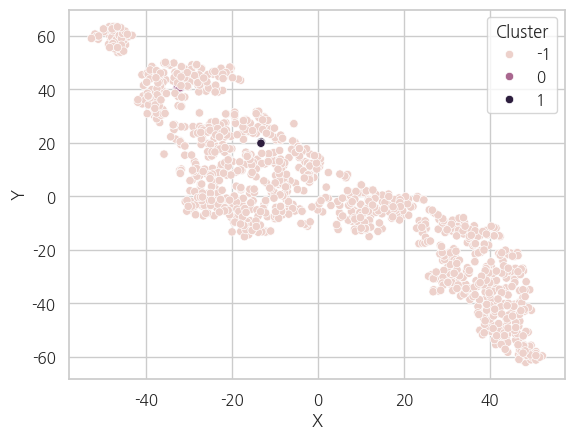

In [ ]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster', data = df)
plt.show()

In [ ]:
# KMeans 모델
kmeans = KMeans(n_clusters=8, random_state=319, n_init = 'auto') # 클러스터 개수를 지정하여 최적의 군집을 찾습니다.
label = kmeans.fit_predict(df[['X', 'Y']])
df['Cluster'] = label

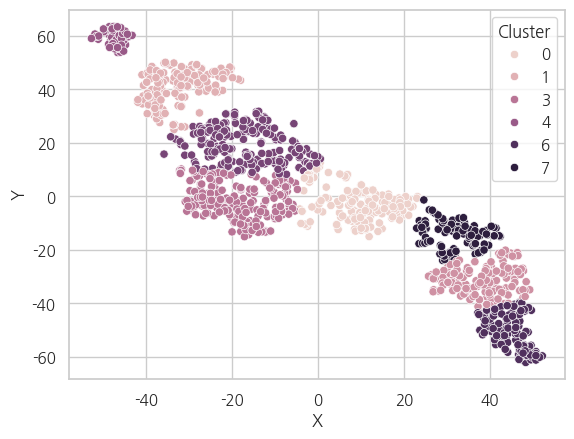

In [ ]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Cluster', data = df)
plt.show()

In [ ]:
# 클러스터에 어떤 포켓몬이 포함되어 있을까?
cluster = 3
df[df['Cluster'] == cluster][['Name','Total']]

,Name,Total
19,독침붕,495
22,피죤투,479
31,아보크,448
34,라이츄,485
35,라이츄,485
...,...,...
1152,묘두기,488
1153,꼬이밍고,500
1156,가비루사,478
1162,토오,430


### 분포별 박스플롯 시각화를 위한 데이터 조작

In [ ]:
# 추출하고자 하는 컬럼명
cols = list(df.iloc[:,4:9].columns); print(cols)

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']


In [ ]:
# 추출하고자 하는 컬럼명 추가
cols.extend(['Physical', 'Special', 'Cluster']); print(cols)

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Physical', 'Special', 'Cluster']


In [ ]:
# 데이터 재구조화 (pd.melt)
tmp = pd.melt(df, id_vars = ['#', 'Cluster'], value_vars = cols, var_name = 'Stats', value_name = 'Value')

In [ ]:
# 클러스터 확인
cluster = 3
tmp[tmp['Cluster'] == cluster]

,#,Cluster,Stats,Value
19,15,3,HP,65
22,18,3,HP,83
31,24,3,HP,60
34,26,3,HP,60
35,26,3,HP,60
...,...,...,...,...
8442,972,3,Special,147
8443,973,3,Special,139
8446,976,3,Special,143
8452,980,3,Special,145


In [ ]:
# 클러스터별 포켓몬 수 카운트
tmp.groupby('Cluster')['#'].count() / len(tmp.Stats.unique())

Cluster
0    175.0
1    168.0
2    161.0
3    211.0
4     55.0
5    211.0
6    125.0
7    109.0
Name: #, dtype: float64

In [ ]:
# 클러스터별 능력치 평균
tmp.groupby('Cluster')['Value'].mean()

Cluster
0     90.853878
1    127.506803
2     66.838509
3    104.503724
4    154.371429
5    113.113744
6     51.178286
7     75.743119
Name: Value, dtype: float64

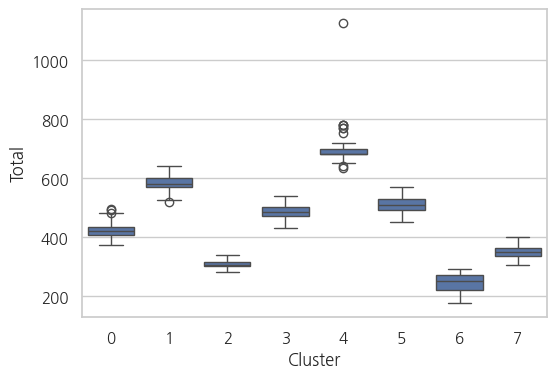

In [ ]:
# 클러스터별 박스플롯
plt.figure(figsize = (6,4),dpi = 100)
sns.boxplot(data = df, x = 'Cluster', y = 'Total')
plt.show()

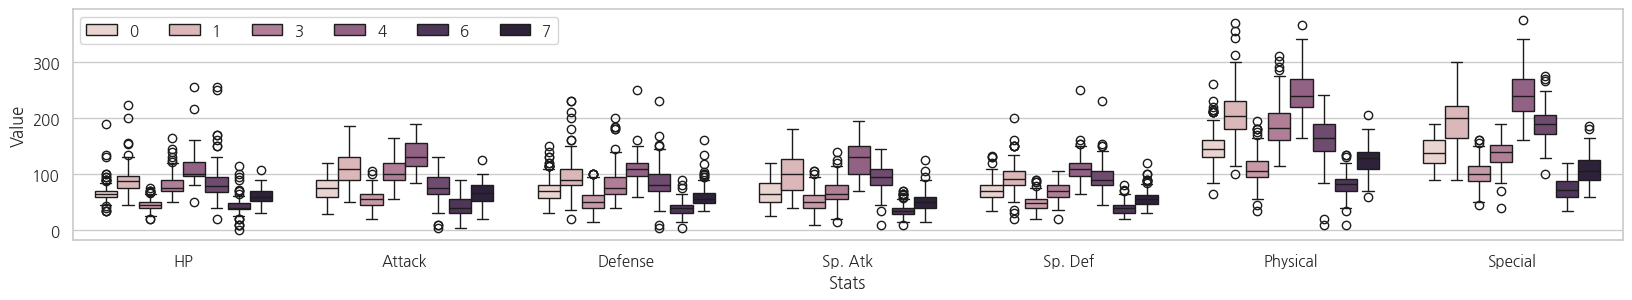

In [ ]:
# 능력치 기준 클러스터 박스플롯
plt.figure(figsize = (20,3),dpi = 100)
sns.boxplot(data = tmp, x = 'Stats', y = 'Value', hue = 'Cluster')

plt.legend(ncol = 8)
plt.show()

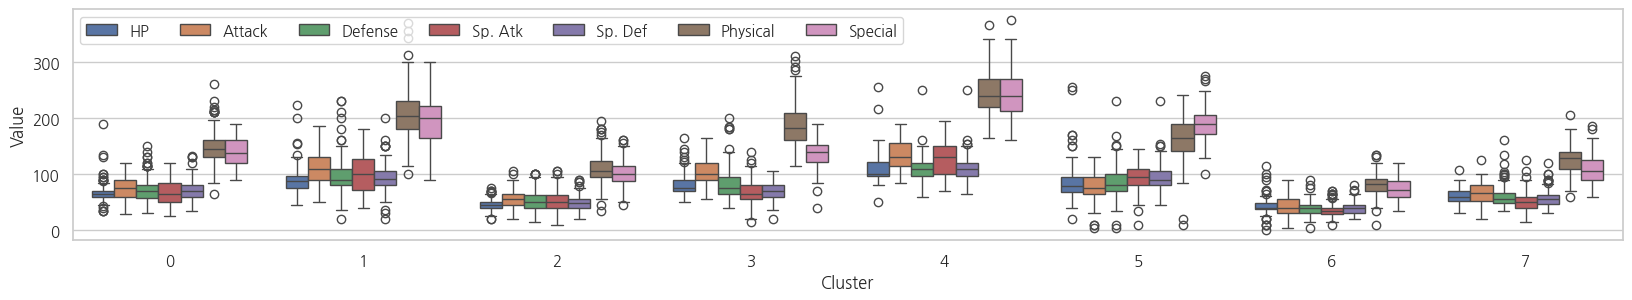

In [ ]:
# 클러스터 기준 세부 능력치 박스플롯
plt.figure(figsize = (20,3),dpi = 100)
sns.boxplot(data = tmp, x = 'Cluster', y = 'Value', hue = 'Stats')

plt.legend(ncol = 8)
plt.show()